# Capstone Project

In [123]:
import numpy as np
import pandas as pd 
import json
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


## Download and Explore Toronto Dataset

The dataset being used comes from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M.

In [124]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)

df_toronto = table[0]
df_toronto.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [125]:
#Remove cells with a borough that is Not assigned.
df_toronto.drop(df_toronto[df_toronto.Borough == 'Not assigned'].index, inplace=True)
#df_toronto.head()

#Combine the neighborhoods that exists in one postal code
df_toronto = df_toronto.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(lambda x: ','.join(x)).reset_index()
#df_toronto.head()

#Change unassigned Neighborhood to its Borough's name
df_toronto.loc[85,'Neighborhood'] = 'Queen\'s Park'

print (df_toronto.shape)

df_toronto.head()

(103, 3)


,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [126]:
trt_geo = pd.read_csv("http://cocl.us/Geospatial_data")
trt_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [127]:
#Join the geo data to Neighborhoods dataframe
df_toronto.set_index("Postal Code")
trt_geo.set_index("Postal Code")
trt_neighbor=pd.merge(df_toronto, trt_geo )
trt_neighbor.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [128]:
print('Toronto has {} boroughs and {} neighborhoods.'.format(
        len(trt_neighbor['Borough'].unique()),
        trt_neighbor.shape[0]
    )
)

Toronto has 10 boroughs and 103 neighborhoods.


Since West Toronto has the highest density in City of Toronto, we will take a closer look on it. 

In [129]:
address = 'West Toronto'

geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of West Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of West Toronto are 43.6534817, -79.3839347.


In [130]:
trt_neighbor = trt_neighbor[trt_neighbor['Borough'] == 'West Toronto']

In [131]:
trt_neighbor.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
76,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
77,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
78,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
82,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763
83,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325


## Download and Explore New York dataset

In [132]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [133]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [45]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [134]:
neighborhoods_data = newyork_data['features']

In [135]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [136]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
nyc_neighborhoods = pd.DataFrame(columns = column_names)

In [137]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [138]:
nyc_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [139]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyc_neighborhoods['Borough'].unique()),
        nyc_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [140]:
address = 'Manhattan'

geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7896239, -73.9598939.


In [141]:
nyc_neighborhoods = nyc_neighborhoods[nyc_neighborhoods['Borough'] == 'Manhattan']

In [142]:
nyc_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
100,Manhattan,Chinatown,40.715618,-73.994279
101,Manhattan,Washington Heights,40.851903,-73.936900
102,Manhattan,Inwood,40.867684,-73.921210
103,Manhattan,Hamilton Heights,40.823604,-73.949688


## Get Venue information from Foursquare

In [143]:
CLIENT_ID = '4F2JIUHDZDLYXUA3HSYMZRGSRTKURWECTFFWVUA5OHQPRQAA' # your Foursquare ID
CLIENT_SECRET = 'G4UHXNZISLUGY4RVAJ3YBHLH2B1JHCT4Z1TYHX4B2ACUFBLN' # your Foursquare Secret
VERSION = '20200528'

In [144]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=1000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
# Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
# Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
# return only needed information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [145]:
toronto_venues = getNearbyVenues(names=trt_neighbor['Neighborhood'],
                                   latitudes=trt_neighbor['Latitude'],
                                   longitudes=trt_neighbor['Longitude']
                                  )

Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction South
Parkdale, Roncesvalles
Runnymede, Swansea


In [146]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Dufferin, Dovercourt Village",43.669005,-79.442259,The Greater Good Bar,43.669409,-79.439267,Bar
1,"Dufferin, Dovercourt Village",43.669005,-79.442259,Parallel,43.669516,-79.438728,Middle Eastern Restaurant
2,"Dufferin, Dovercourt Village",43.669005,-79.442259,FreshCo,43.667918,-79.440754,Grocery Store
3,"Dufferin, Dovercourt Village",43.669005,-79.442259,Blood Brothers Brewing,43.669944,-79.436533,Brewery
4,"Dufferin, Dovercourt Village",43.669005,-79.442259,Happy Bakery & Pastries,43.667050,-79.441791,Bakery


In [147]:
trt_restaurant = toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant',case = True)]

In [148]:
trt_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,"Dufferin, Dovercourt Village",43.669005,-79.442259,Parallel,43.669516,-79.438728,Middle Eastern Restaurant
17,"Little Portugal, Trinity",43.647927,-79.419750,OddSeoul,43.646192,-79.419601,Korean Restaurant
19,"Little Portugal, Trinity",43.647927,-79.419750,Foxley Bistro,43.648643,-79.420495,Asian Restaurant
21,"Little Portugal, Trinity",43.647927,-79.419750,La Cubana,43.646230,-79.419636,Cuban Restaurant
24,"Little Portugal, Trinity",43.647927,-79.419750,Union Restaurant,43.645860,-79.419532,New American Restaurant


In [149]:
trt_top = trt_restaurant.groupby('Neighborhood') [['Venue']].count().reset_index().sort_values(by = 'Venue', ascending = False).head(10)
trt_top.head()

,Neighborhood,Venue
3,"Little Portugal, Trinity",17
5,"Runnymede, Swansea",9
2,"High Park, The Junction South",7
4,"Parkdale, Roncesvalles",4
0,"Brockton, Parkdale Village, Exhibition Place",2


<BarContainer object of 6 artists>

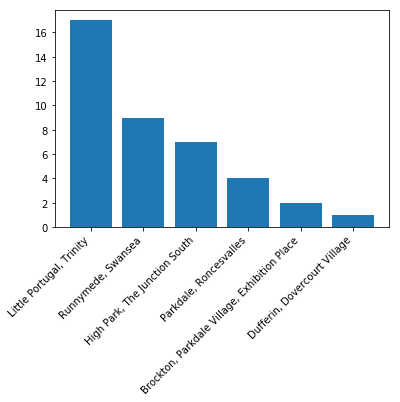

In [150]:
height = trt_top['Venue']
bars = trt_top['Neighborhood']
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.bar(bars,height)

In [151]:
trt_top = trt_top.head(1)
trt_onehot = pd.merge(trt_restaurant, trt_top, how = 'inner', on='Neighborhood')
trt_onehot.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue_x,Venue Latitude,Venue Longitude,Venue Category,Venue_y
0,"Little Portugal, Trinity",43.647927,-79.41975,OddSeoul,43.646192,-79.419601,Korean Restaurant,17
1,"Little Portugal, Trinity",43.647927,-79.41975,Foxley Bistro,43.648643,-79.420495,Asian Restaurant,17
2,"Little Portugal, Trinity",43.647927,-79.41975,La Cubana,43.646230,-79.419636,Cuban Restaurant,17
3,"Little Portugal, Trinity",43.647927,-79.41975,Union Restaurant,43.645860,-79.419532,New American Restaurant,17
4,"Little Portugal, Trinity",43.647927,-79.41975,Mamakas Taverna,43.645908,-79.419654,Greek Restaurant,17


In [152]:
trt_category = trt_restaurant.groupby(['Venue Category']).count()
trt_category = trt_category[['Venue']]
trt_category.shape

(22, 1)

In [153]:
trt_grouped = trt_onehot.groupby(['Neighborhood','Venue Category']).count().reset_index().sort_values(by = 'Neighborhood')
trt_grouped = trt_grouped[['Neighborhood','Venue Category', 'Venue_y']]
trt_grouped

,Neighborhood,Venue Category,Venue_y
0,"Little Portugal, Trinity",Asian Restaurant,3
1,"Little Portugal, Trinity",Cuban Restaurant,1
2,"Little Portugal, Trinity",French Restaurant,1
3,"Little Portugal, Trinity",Greek Restaurant,1
4,"Little Portugal, Trinity",Italian Restaurant,1
5,"Little Portugal, Trinity",Japanese Restaurant,1
6,"Little Portugal, Trinity",Korean Restaurant,1
7,"Little Portugal, Trinity",Malay Restaurant,1
8,"Little Portugal, Trinity",New American Restaurant,1
9,"Little Portugal, Trinity",Restaurant,2


<BarContainer object of 13 artists>

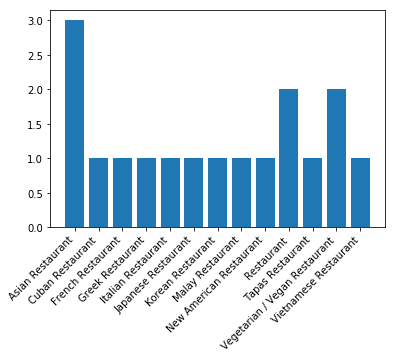

In [154]:
#Draw a chart to show the number of resturants in one neighborhood
height = trt_grouped['Venue_y']
bars = trt_grouped['Venue Category']
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.bar(bars,height)


## NYC Venues

In [155]:
nyc_venues = getNearbyVenues(names=nyc_neighborhoods['Neighborhood'],
                                   latitudes=nyc_neighborhoods['Latitude'],
                                   longitudes=nyc_neighborhoods['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [156]:
nyc_restaurant = nyc_venues[nyc_venues['Venue Category'].str.contains('Restaurant',case = True)]

In [157]:
nyc_top = nyc_restaurant.groupby('Neighborhood') [['Venue']].count().reset_index().sort_values(by = 'Venue', ascending = False).head(10)
nyc_top

,Neighborhood,Venue
12,Greenwich Village,37
4,Chinatown,36
8,East Village,35
33,Turtle Bay,33
27,Noho,32
35,Upper West Side,32
38,Yorkville,29
24,Midtown South,28
26,Murray Hill,27
37,West Village,27


<BarContainer object of 10 artists>

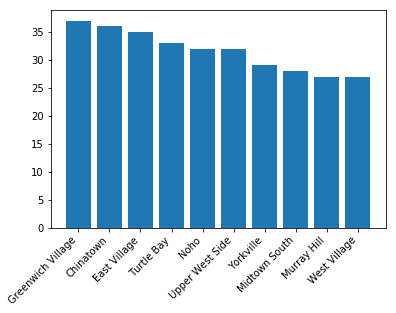

In [158]:
height = nyc_top['Venue']
bars = nyc_top['Neighborhood']
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.bar(bars,height)

In [159]:
nyc_top = nyc_top.head(1)
nyc_onehot = pd.merge(nyc_restaurant, nyc_top, how = 'inner', on='Neighborhood')
nyc_onehot.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue_x,Venue Latitude,Venue Longitude,Venue Category,Venue_y
0,Greenwich Village,40.726933,-73.999914,Carbone,40.727903,-74.000136,Italian Restaurant,37
1,Greenwich Village,40.726933,-73.999914,Coco Pazzo Kitchen & Restaurant,40.726036,-74.001507,Italian Restaurant,37
2,Greenwich Village,40.726933,-73.999914,DomoDomo,40.728007,-74.001683,Sushi Restaurant,37
3,Greenwich Village,40.726933,-73.999914,Miss Lily's & Melvin's Juice Box,40.727916,-74.001423,Caribbean Restaurant,37
4,Greenwich Village,40.726933,-73.999914,Tomoe Sushi,40.727743,-74.000267,Sushi Restaurant,37


In [160]:
nyc_category = nyc_restaurant.groupby(['Venue Category']).count()
nyc_category = nyc_category[['Venue']]
nyc_category.shape

(76, 1)

In [161]:
nyc_grouped = nyc_onehot.groupby(['Neighborhood','Venue Category']).count().reset_index().sort_values(by = 'Neighborhood')
nyc_grouped = nyc_grouped[['Neighborhood','Venue Category', 'Venue_y']]
nyc_grouped

,Neighborhood,Venue Category,Venue_y
0,Greenwich Village,American Restaurant,1
17,Greenwich Village,Thai Restaurant,1
16,Greenwich Village,Tapas Restaurant,1
15,Greenwich Village,Sushi Restaurant,5
14,Greenwich Village,Seafood Restaurant,2
13,Greenwich Village,Ramen Restaurant,1
12,Greenwich Village,New American Restaurant,1
11,Greenwich Village,Middle Eastern Restaurant,1
10,Greenwich Village,Mediterranean Restaurant,1
9,Greenwich Village,Lebanese Restaurant,1


<BarContainer object of 20 artists>

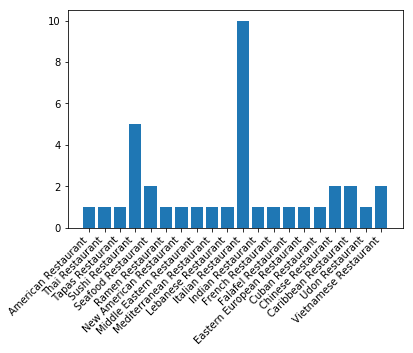

In [162]:
height = nyc_grouped['Venue_y']
bars = nyc_grouped['Venue Category']
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.bar(bars,height)

## Toronto Clusters

In [163]:
# one hot encoding
wt_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
wt_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [wt_onehot.columns[-1]] + list(wt_onehot.columns[:-1])
wt_onehot = wt_onehot[fixed_columns]

wt_onehot.head()

,Neighborhood,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Beer Store,Bookstore,...,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Dufferin, Dovercourt Village",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Dufferin, Dovercourt Village",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Dufferin, Dovercourt Village",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Dufferin, Dovercourt Village",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Dufferin, Dovercourt Village",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
wt_grouped = wt_onehot.groupby('Neighborhood').mean().reset_index()
wt_grouped

,Neighborhood,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Beer Store,Bookstore,...,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.043478,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Dufferin, Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.133333,0.066667,0.066667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000
2,"High Park, The Junction South",0.043478,0.000000,0.043478,0.000000,0.043478,0.000000,0.043478,0.000000,0.043478,...,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Little Portugal, Trinity",0.000000,0.022222,0.000000,0.066667,0.000000,0.000000,0.111111,0.022222,0.000000,...,0.000000,0.022222,0.000000,0.000000,0.022222,0.044444,0.022222,0.022222,0.000000,0.022222
4,"Parkdale, Roncesvalles",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Runnymede, Swansea",0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.026316,0.000000,0.026316,...,0.078947,0.000000,0.026316,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.026316


In [165]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [166]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = wt_grouped['Neighborhood']

for ind in np.arange(wt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(wt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Coffee Shop,Performing Arts Venue,Intersection,Italian Restaurant,Furniture / Home Store,Nightclub,Grocery Store
1,"Dufferin, Dovercourt Village",Bakery,Pharmacy,Pet Store,Grocery Store,Café,Music Venue,Brewery,Supermarket,Middle Eastern Restaurant,Bar
2,"High Park, The Junction South",Café,Thai Restaurant,Mexican Restaurant,Antique Shop,Gastropub,Italian Restaurant,Furniture / Home Store,Fried Chicken Joint,Flea Market,Fast Food Restaurant
3,"Little Portugal, Trinity",Bar,Asian Restaurant,Men's Store,Vegetarian / Vegan Restaurant,Café,Coffee Shop,Restaurant,French Restaurant,Malay Restaurant,Mac & Cheese Joint
4,"Parkdale, Roncesvalles",Gift Shop,Breakfast Spot,Cuban Restaurant,Bookstore,Eastern European Restaurant,Movie Theater,Coffee Shop,Restaurant,Dog Run,Dessert Shop
5,"Runnymede, Swansea",Coffee Shop,Sushi Restaurant,Café,Italian Restaurant,Pizza Place,Pub,Yoga Studio,Sandwich Place,Diner,Dessert Shop


In [167]:
from sklearn.cluster import KMeans

wt_grouped = wt_onehot.groupby('Neighborhood').mean().reset_index()
wt_grouped

# set number of clusters
kclusters = 3

wt_grouped_clustering = wt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(wt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
kmeans.labels_

array([0, 1, 0, 0, 2, 0], dtype=int32)

In [168]:
trt_neighbor['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
trt_neighbor = trt_neighbor.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

trt_neighbor.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,Bakery,Pharmacy,Pet Store,Grocery Store,Café,Music Venue,Brewery,Supermarket,Middle Eastern Restaurant,Bar
77,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,1,Bar,Asian Restaurant,Men's Store,Vegetarian / Vegan Restaurant,Café,Coffee Shop,Restaurant,French Restaurant,Malay Restaurant,Mac & Cheese Joint
78,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,0,Café,Bakery,Breakfast Spot,Coffee Shop,Performing Arts Venue,Intersection,Italian Restaurant,Furniture / Home Store,Nightclub,Grocery Store
82,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,0,Café,Thai Restaurant,Mexican Restaurant,Antique Shop,Gastropub,Italian Restaurant,Furniture / Home Store,Fried Chicken Joint,Flea Market,Fast Food Restaurant
83,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,2,Gift Shop,Breakfast Spot,Cuban Restaurant,Bookstore,Eastern European Restaurant,Movie Theater,Coffee Shop,Restaurant,Dog Run,Dessert Shop


In [169]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(trt_neighbor['Latitude'], trt_neighbor['Longitude'], trt_neighbor['Neighborhood'], trt_neighbor['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [170]:
wt_cluster_0 = trt_neighbor.loc[trt_neighbor['Cluster Labels'] == 0, trt_neighbor.columns[[1] + list(range(4, trt_neighbor.shape[1]))]]

wt_cluster_1 = trt_neighbor.loc[trt_neighbor['Cluster Labels'] == 1, trt_neighbor.columns[[1] + list(range(4, trt_neighbor.shape[1]))]]

wt_cluster_2 = trt_neighbor.loc[trt_neighbor['Cluster Labels'] == 2, trt_neighbor.columns[[1] + list(range(4, trt_neighbor.shape[1]))]]

In [171]:
wt_cluster_0

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,West Toronto,-79.442259,0,Bakery,Pharmacy,Pet Store,Grocery Store,Café,Music Venue,Brewery,Supermarket,Middle Eastern Restaurant,Bar
78,West Toronto,-79.428191,0,Café,Bakery,Breakfast Spot,Coffee Shop,Performing Arts Venue,Intersection,Italian Restaurant,Furniture / Home Store,Nightclub,Grocery Store
82,West Toronto,-79.464763,0,Café,Thai Restaurant,Mexican Restaurant,Antique Shop,Gastropub,Italian Restaurant,Furniture / Home Store,Fried Chicken Joint,Flea Market,Fast Food Restaurant
84,West Toronto,-79.484450,0,Coffee Shop,Sushi Restaurant,Café,Italian Restaurant,Pizza Place,Pub,Yoga Studio,Sandwich Place,Diner,Dessert Shop


In [314]:
wt_cluster_1

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
77,West Toronto,-79.41975,1,Bar,Asian Restaurant,Men's Store,Vegetarian / Vegan Restaurant,Café,Coffee Shop,Restaurant,French Restaurant,Malay Restaurant,Mac & Cheese Joint


In [172]:
wt_cluster_2

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,West Toronto,-79.456325,2,Gift Shop,Breakfast Spot,Cuban Restaurant,Bookstore,Eastern European Restaurant,Movie Theater,Coffee Shop,Restaurant,Dog Run,Dessert Shop


## NYC Clusters

In [173]:
# one hot encoding
m_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
m_onehot['Neighborhood']= nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [m_onehot.columns[-1]] + list(m_onehot.columns[:-1])
m_onehot = m_onehot[fixed_columns]

m_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
m_grouped = m_onehot.groupby('Neighborhood').mean().reset_index()
m_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.000000,0.011494,0.000000,0.000000,0.000000,0.011494,...,0.00,0.022989,0.000000,0.000000,0.000000,0.011494,0.034483,0.000000,0.000000,0.034483
2,Central Harlem,0.000000,0.00,0.00,0.066667,0.044444,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
5,Civic Center,0.000000,0.00,0.00,0.000000,0.040404,0.010101,0.000000,0.000000,0.000000,...,0.00,0.010101,0.000000,0.000000,0.010101,0.010101,0.010101,0.010101,0.000000,0.020202
6,Clinton,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,...,0.00,0.020000,0.000000,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.000000,0.00,0.00,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.010000,0.010000


In [175]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

m_venues_sorted = pd.DataFrame(columns=columns)
m_venues_sorted['Neighborhood'] = m_grouped['Neighborhood']

for ind in np.arange(m_grouped.shape[0]):
    m_venues_sorted.iloc[ind, 1:] = return_most_common_venues(m_grouped.iloc[ind, :], num_top_venues)

m_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Memorial Site,Gym,Coffee Shop,Playground,Food Court,Mexican Restaurant,Shopping Mall,Gourmet Shop
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Bookstore,Gym / Fitness Center,Gym,Italian Restaurant,Pizza Place,Wine Shop,Vietnamese Restaurant
2,Central Harlem,African Restaurant,Seafood Restaurant,Gym / Fitness Center,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Café,Boutique,Market
3,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,Café,American Restaurant,Bakery,Pizza Place,Cocktail Bar,Market,Seafood Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop
5,Civic Center,Coffee Shop,Hotel,Cocktail Bar,Spa,Park,American Restaurant,Gym / Fitness Center,French Restaurant,Café,Sporting Goods Shop
6,Clinton,Theater,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Hotel,Gym,Cocktail Bar,Wine Shop,Thai Restaurant,American Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Sandwich Place,Latin American Restaurant,Pizza Place,French Restaurant,Beer Bar,Pharmacy
8,East Village,Mexican Restaurant,Bar,Coffee Shop,Cocktail Bar,Speakeasy,Ice Cream Shop,Juice Bar,Pizza Place,Wine Bar,Seafood Restaurant
9,Financial District,Coffee Shop,Pizza Place,Hotel,American Restaurant,Italian Restaurant,Café,Juice Bar,Sandwich Place,Cocktail Bar,Steakhouse


In [178]:
from sklearn.cluster import KMeans

m_grouped = m_onehot.groupby('Neighborhood').mean().reset_index()
m_grouped

# set number of clusters
kclusters = 3

m_grouped_clustering = m_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(m_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
kmeans.labels_

array([2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1], dtype=int32)

In [180]:
nyc_neighborhoods['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_neighborhoods = nyc_neighborhoods.join(m_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyc_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Manhattan,Marble Hill,40.876551,-73.910660,2,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Pharmacy,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Deli / Bodega
100,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop
101,Manhattan,Washington Heights,40.851903,-73.936900,2,Café,Bakery,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bank,Spanish Restaurant,Pizza Place
102,Manhattan,Inwood,40.867684,-73.921210,1,Mexican Restaurant,Lounge,Bakery,Café,Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant
103,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Pizza Place,Mexican Restaurant,Coffee Shop,Deli / Bodega,Café,Sushi Restaurant,Bakery,Cocktail Bar,Yoga Studio,Chinese Restaurant


In [181]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_neighborhoods['Latitude'], nyc_neighborhoods['Longitude'], nyc_neighborhoods['Neighborhood'], nyc_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [184]:
nyc_cluster_0 = nyc_neighborhoods.loc[nyc_neighborhoods['Cluster Labels'] == 0, nyc_neighborhoods.columns[[1] + list(range(4, nyc_neighborhoods.shape[1]))]]

nyc_cluster_1 = nyc_neighborhoods.loc[nyc_neighborhoods['Cluster Labels'] == 1, nyc_neighborhoods.columns[[1] + list(range(4, nyc_neighborhoods.shape[1]))]]

nyc_cluster_2 = nyc_neighborhoods.loc[nyc_neighborhoods['Cluster Labels'] == 2, nyc_neighborhoods.columns[[1] + list(range(4, nyc_neighborhoods.shape[1]))]]

In [190]:
nyc_cluster_0

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
106,East Harlem,0,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Sandwich Place,Latin American Restaurant,Pizza Place,French Restaurant,Beer Bar,Pharmacy
112,Lincoln Square,0,Plaza,Italian Restaurant,Café,Gym / Fitness Center,Theater,Performing Arts Venue,Concert Hall,Wine Shop,French Restaurant,Indie Movie Theater
114,Midtown,0,Hotel,Coffee Shop,Theater,Bakery,Clothing Store,Sushi Restaurant,Japanese Restaurant,Cuban Restaurant,Pizza Place,Mediterranean Restaurant
120,Tribeca,0,Park,American Restaurant,Italian Restaurant,Wine Bar,Greek Restaurant,Spa,Café,Coffee Shop,Scenic Lookout,Skate Park
250,Midtown South,0,Korean Restaurant,Hotel,Dessert Shop,Burger Joint,Coffee Shop,Japanese Restaurant,Café,American Restaurant,Gym / Fitness Center,Hotel Bar
275,Stuyvesant Town,0,Boat or Ferry,Park,Playground,Heliport,Fountain,Farmers Market,Skating Rink,Gas Station,Bistro,Bar


In [191]:
nyc_cluster_1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
100,Chinatown,1,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop
102,Inwood,1,Mexican Restaurant,Lounge,Bakery,Café,Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant
103,Hamilton Heights,1,Pizza Place,Mexican Restaurant,Coffee Shop,Deli / Bodega,Café,Sushi Restaurant,Bakery,Cocktail Bar,Yoga Studio,Chinese Restaurant
107,Upper East Side,1,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Bakery,Yoga Studio,French Restaurant,Spa,American Restaurant,Juice Bar,Pizza Place
108,Yorkville,1,Coffee Shop,Gym,Italian Restaurant,Bar,Sushi Restaurant,Pizza Place,Deli / Bodega,Mexican Restaurant,Wine Shop,Japanese Restaurant
109,Lenox Hill,1,Coffee Shop,Pizza Place,Italian Restaurant,Sushi Restaurant,Café,Cocktail Bar,Gym / Fitness Center,Gym,Burger Joint,Art Gallery
110,Roosevelt Island,1,Park,Deli / Bodega,Dog Run,Coffee Shop,Greek Restaurant,Outdoors & Recreation,Monument / Landmark,Sandwich Place,Liquor Store,Dry Cleaner
111,Upper West Side,1,Bar,Italian Restaurant,Dessert Shop,Wine Bar,Indian Restaurant,Middle Eastern Restaurant,Bagel Shop,Thai Restaurant,Mexican Restaurant,Mediterranean Restaurant
115,Murray Hill,1,Hotel,Sandwich Place,Pizza Place,Japanese Restaurant,Coffee Shop,Gym / Fitness Center,Mediterranean Restaurant,Deli / Bodega,Bar,Chinese Restaurant
117,Greenwich Village,1,Italian Restaurant,Café,Sushi Restaurant,Burger Joint,Spa,Comedy Club,Dessert Shop,Pizza Place,Coffee Shop,Clothing Store


In [192]:
nyc_cluster_2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Marble Hill,2,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Pharmacy,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Deli / Bodega
101,Washington Heights,2,Café,Bakery,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bank,Spanish Restaurant,Pizza Place
104,Manhattanville,2,Coffee Shop,Seafood Restaurant,Park,Bakery,Mexican Restaurant,Chinese Restaurant,Deli / Bodega,Italian Restaurant,Sushi Restaurant,Cosmetics Shop
105,Central Harlem,2,African Restaurant,Seafood Restaurant,Gym / Fitness Center,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Café,Boutique,Market
113,Clinton,2,Theater,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Hotel,Gym,Cocktail Bar,Wine Shop,Thai Restaurant,American Restaurant
116,Chelsea,2,Coffee Shop,Art Gallery,Ice Cream Shop,Café,American Restaurant,Bakery,Pizza Place,Cocktail Bar,Market,Seafood Restaurant
127,Battery Park City,2,Park,Hotel,Memorial Site,Gym,Coffee Shop,Playground,Food Court,Mexican Restaurant,Shopping Mall,Gourmet Shop
247,Carnegie Hill,2,Coffee Shop,Café,Yoga Studio,Bookstore,Gym / Fitness Center,Gym,Italian Restaurant,Pizza Place,Wine Shop,Vietnamese Restaurant
248,Noho,2,Pizza Place,Coffee Shop,Grocery Store,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Wine Bar,Wine Shop,Hotel
249,Civic Center,2,Coffee Shop,Hotel,Cocktail Bar,Spa,Park,American Restaurant,Gym / Fitness Center,French Restaurant,Café,Sporting Goods Shop
